In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("svm.csv")
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df.shape

(30000, 25)

In [12]:
df.describe()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [13]:
df.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

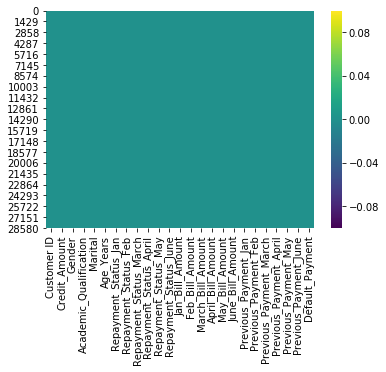

In [19]:
sns.heatmap(df.isnull(), cmap = "viridis")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [22]:
x = df.drop("Default_Payment", axis=1)
y = df["Default_Payment"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
model = SVC()
model.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
pred = model.predict(x_test)

In [29]:
accuracy_test = accuracy_score(y_test, pred)
accuracy_test

0.781